# **Segmentation:** Region-Growing Method

# **IPPR Expt 5a: Segmentation with Region-Growing Method**

Name: Shwetha Iyer

PRN: 1032211195

Performed on: 1/3/24

Submitted on: 3/3/24

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

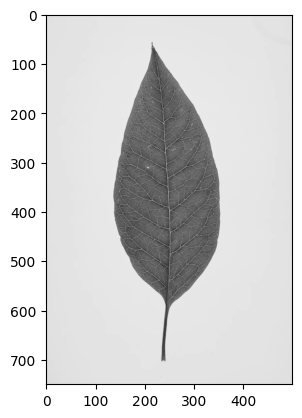

In [ ]:
image = cv2.imread("leaf.jpeg",0)
#_,image = cv2.threshold(image,165,255,cv2.THRESH_BINARY_INV)
plt.imshow(image, cmap='gray')

# ***Region-Growing for Binary Image***

In [ ]:
#using single seed point
def RegionGrowing(image, seed):
    mask = np.zeros((image.shape), np.uint8)
    seed_x, seed_y = seed
    threshold = image[seed_x, seed_y]

    queue = []
    queue.append((seed_x, seed_y))

    while queue:
        seed_x, seed_y = queue.pop(0)
        if seed_x < 0 or seed_y < 0 or seed_x >= image.shape[0] or seed_y >= image.shape[1]:
            continue
        if mask[seed_x, seed_y] == 255:
            continue

        if np.abs(int(image[seed_x, seed_y]) - int(threshold)) <= 50:
            mask[seed_x, seed_y] = 255
            queue.append((seed_x - 1, seed_y))
            queue.append((seed_x + 1, seed_y))
            queue.append((seed_x, seed_y - 1))
            queue.append((seed_x, seed_y + 1))

    return mask

Text(0.5, 1.0, 'Result of Binary Region-Based Segmentation')

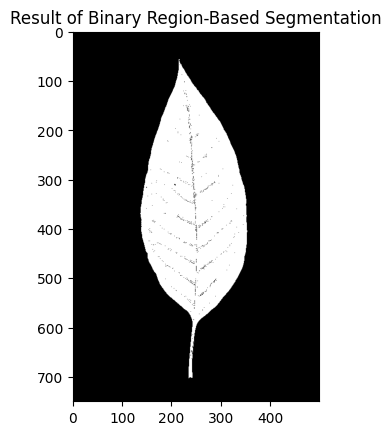

In [ ]:
res = RegionGrowing(image, (250,200))
plt.imshow(res, cmap='gray')
plt.title("Result of Binary Region-Based Segmentation")

# ***Visualization of Growth of Region***

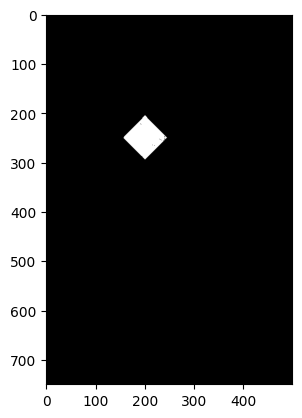

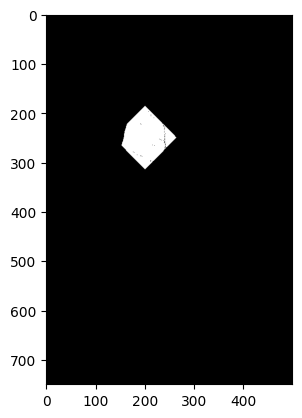

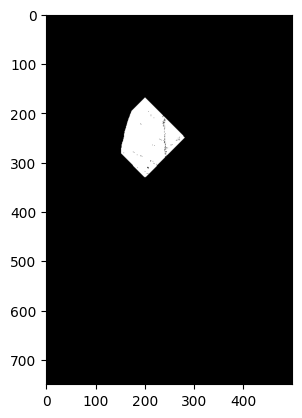

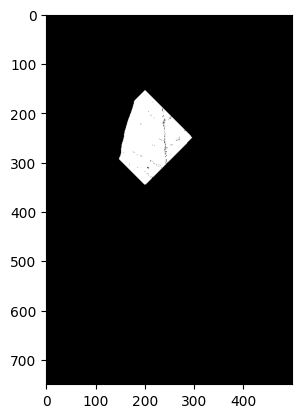

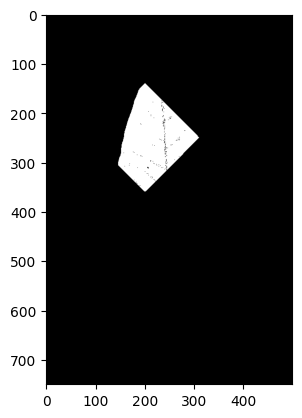

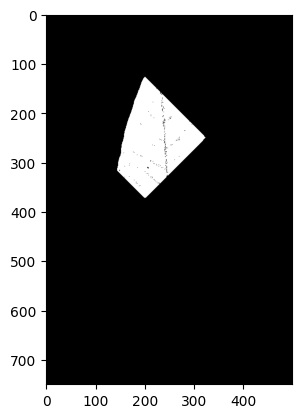

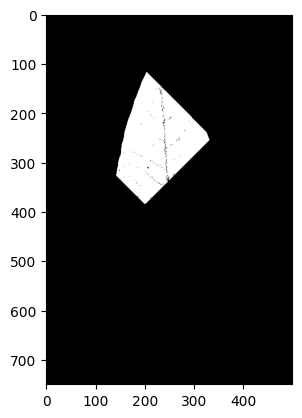

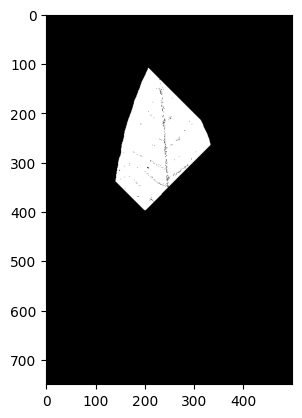

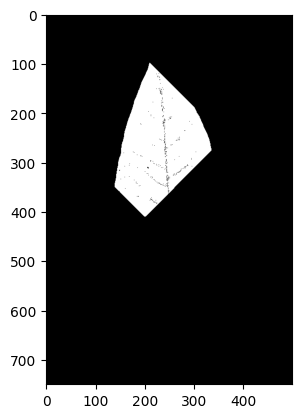

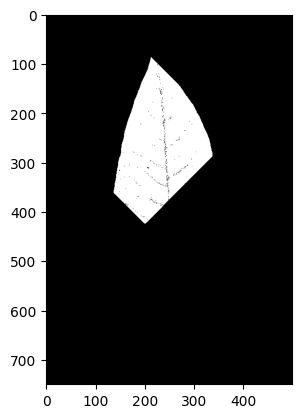

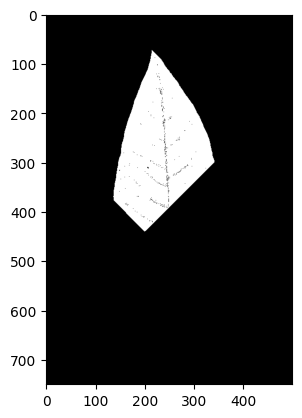

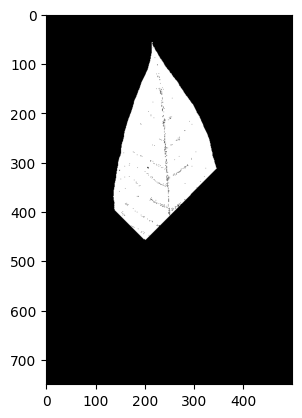

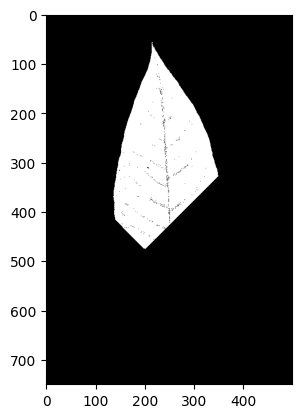

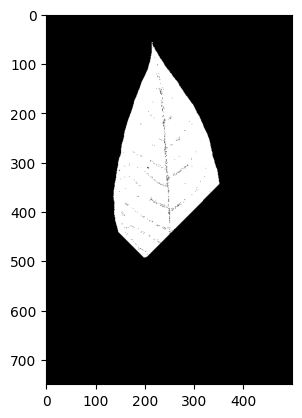

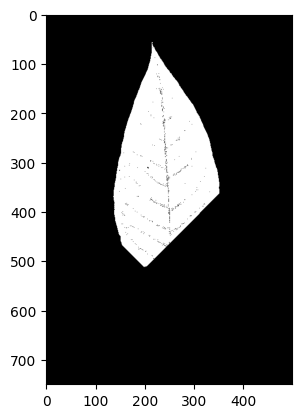

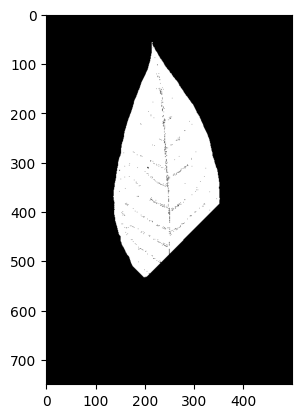

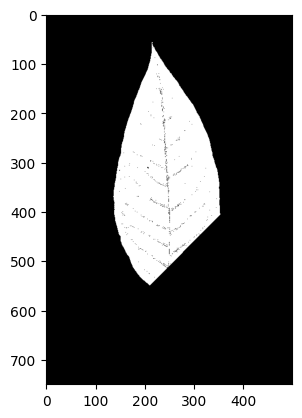

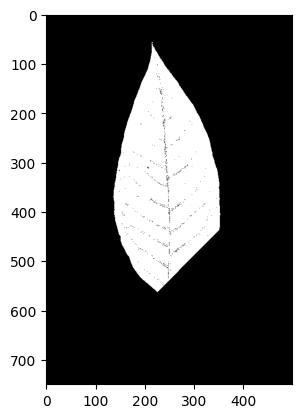

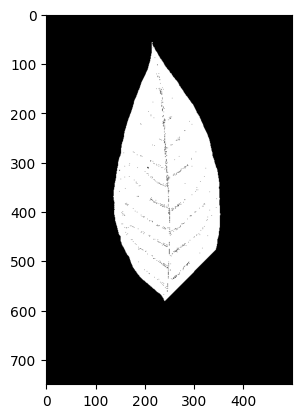

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def RegionGrowing(image, seed, visualize_every=1):
    mask = np.zeros((image.shape), np.uint8)
    seed_x, seed_y = seed
    threshold = image[seed_x, seed_y]

    queue = []
    queue.append((seed_x, seed_y))

    iteration_count = 0
    while queue:
        seed_x, seed_y = queue.pop(0)
        if seed_x < 0 or seed_y < 0 or seed_x >= image.shape[0] or seed_y >= image.shape[1]:
            continue
        if mask[seed_x, seed_y] == 255:
            continue

        if np.abs(int(image[seed_x, seed_y]) - int(threshold)) <= 50:
            mask[seed_x, seed_y] = 255
            queue.append((seed_x - 1, seed_y))
            queue.append((seed_x + 1, seed_y))
            queue.append((seed_x, seed_y - 1))
            queue.append((seed_x, seed_y + 1))

        iteration_count += 1
        if iteration_count % visualize_every == 0:
            plt.imshow(mask, cmap='gray')
            plt.pause(0.1)

RegionGrowing(image, (250,200), visualize_every=4000)

# ***In-Built Function:***
**skimage.segmentation.flood**: Generates mask corresponding to a flood fill. Starting at a specific seed_point, connected points equal or within tolerance of the seed value are found.

Text(0.5, 1.0, 'Using flood()')

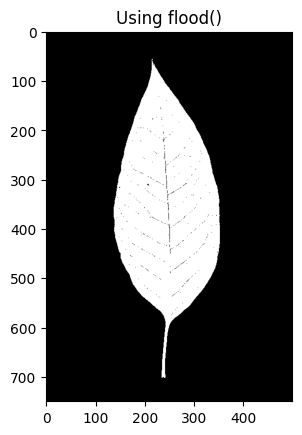

In [ ]:
from skimage.segmentation import flood, random_walker
img = cv2.threshold(image,160,255,cv2.THRESH_BINARY_INV)[1]
labels = flood(img, (250, 200), tolerance = 0.1)
plt.imshow(labels, cmap='gray')
plt.title("Using flood()")

# ***Region-Growing for Multiple Regions***

In [ ]:
def region_growing(image, seed_points, threshold=10):
    num_regions = len(seed_points)
    height, width = image.shape[:2]
    masks = [np.zeros(image.shape, dtype=np.uint8) for _ in range(num_regions)]
    queues = [[] for _ in range(num_regions)]

    for i, seed_point in enumerate(seed_points):
        queues[i].append(seed_point)

    while any(queues):
        for i, queue in enumerate(queues):
            if not queue:
                continue
            x, y = queue.pop(0)
            seed_value = image[x, y]

            for dx in [-1, 0, 1]:
                for dy in [-1, 0, 1]:
                    if dx == 0 and dy == 0:
                        continue
                    nx, ny = x + dx, y + dy
                    if 0 <= nx < height and 0 <= ny < width:
                        if abs(int(image[nx, ny]) - int(seed_value)) <= threshold and masks[i][nx, ny] == 0:
                            masks[i][nx, ny] = 255
                            queues[i].append((nx, ny))

    return masks

(276, 273)

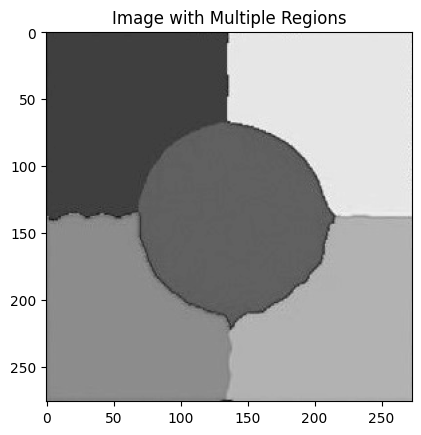

In [ ]:
img = cv2.imread('/content/468_Fig_2.jpg',0)
plt.imshow(img, cmap='gray')
plt.title("Image with Multiple Regions")
img.shape

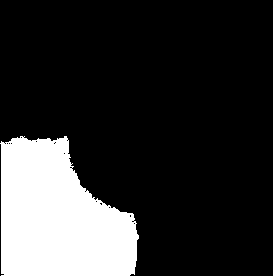

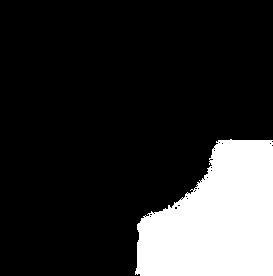

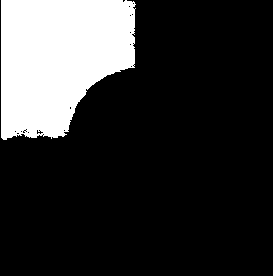

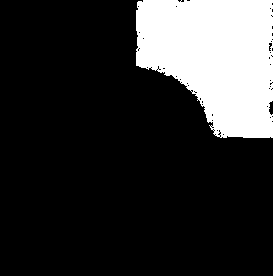

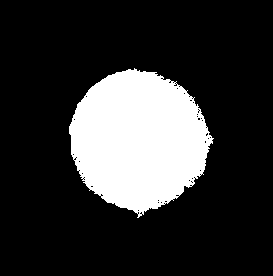

In [ ]:
#one seed-point corresponding to each region
seed_points = [(150, 50),(200, 250),(50,50),(50,250),(150,150)]
regions = region_growing(img, seed_points, 3)

for i, region in enumerate(regions):
    cv2_imshow(region)
    print()

Text(0.5, 1.0, 'Region-Growing Segmentation')

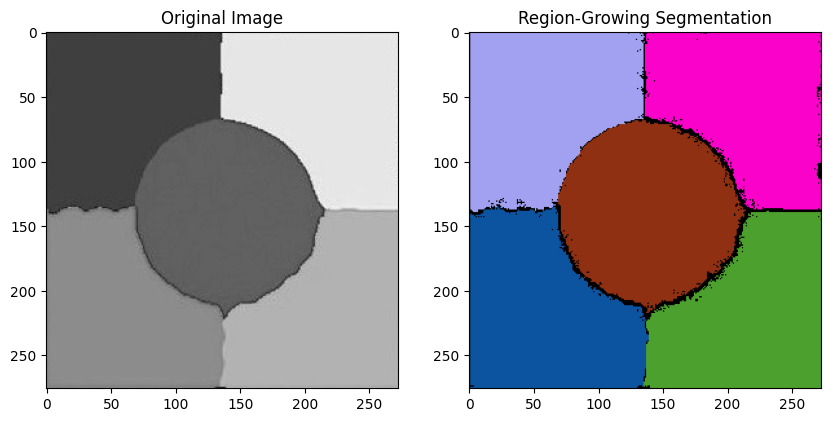

In [ ]:
canvas = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
colors = []
for _ in range(len(seed_points)):
    colors.append((np.random.randint(0, 256),
                   np.random.randint(0, 256),
                   np.random.randint(0, 256)))

for i, region in enumerate(regions):
    canvas[region != 0] = colors[i]

fig, ax = plt.subplots(1,2, figsize = (10,10))
ax[0].imshow(img, cmap='gray')
ax[0].set_title("Original Image")
ax[1].imshow(canvas)
ax[1].set_title("Region-Growing Segmentation")

# ***Q. Write down the algorithm of the implemented region-growing segmentation technique.***

1. Input the image and choose initial seed point/s.

2. For each seed point, create a new region and add the seed point to it.

3. For each pixel in the region:
   - Compare the pixel with its unvisited neighbouring pixels.
   - If any neighbour satisfies the similarity criteria, add it to the region.
   
4. Repeat step 2 until the region stops growing or no more unvisited neighboring pixels are found.